### Data Preprocessing

pre-process the raw football matches data from the folder: 
`data/raw`


In [181]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import os
import mrmr
from mrmr import mrmr_classif
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler


In [91]:
# read all the csv files from the data/raw folder
# walk through the data/raw folder and read all the csv files

directory_path = '../data'  # Replace with your directory path
dataframes = {}

# Walk through the directory and find CSV files
for root, dirs, files in os.walk(directory_path):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            
            # Determine the key and load the dataframe based on the league identifier
            if 'E0' in file:
                dataframes['uk_data'] = pd.read_csv(file_path)
                print(f"Created dataframe: uk_data from {file}")
            elif 'I1' in file:
                dataframes['it_data'] = pd.read_csv(file_path)
                print(f"Created dataframe: it_data from {file}")
            elif 'SP1' in file:
                dataframes['es_data'] = pd.read_csv(file_path)
                print(f"Created dataframe: es_data from {file}")
            elif 'D1' in file:
                dataframes['de_data'] = pd.read_csv(file_path)
                print(f"Created dataframe: de_data from {file}")
            elif 'F1' in file:
                dataframes['fr_data'] = pd.read_csv(file_path)
                print(f"Created dataframe: fr_data from {file}")
            else:
                print(f"File {file} does not match any known league identifier.")

# Access the dataframes
uk_data = dataframes.get('uk_data')
it_data = dataframes.get('it_data')
es_data = dataframes.get('es_data')
de_data = dataframes.get('de_data')
fr_data = dataframes.get('fr_data')          



Created dataframe: de_data from D1_merged.csv
Created dataframe: uk_data from E0_merged.csv
Created dataframe: fr_data from F1_merged.csv
Created dataframe: it_data from I1_merged.csv
Created dataframe: es_data from SP1_merged.csv


In [113]:
valid_feature_names = [
    "Div", "Date", "Time", "HomeTeam", "AwayTeam",
    "FTHG", "FTAG", "FTR", "HTHG", "HTAG", "HTR",
    "Attendance", "Referee", "HS", "AS", "HST", "AST",
    "HHW", "AHW", "HC", "AC", "HF", "AF", "HFKC", "AFKC",
    "HO", "AO", "HY", "AY", "HR", "AR", "HBP", "ABP",
    "B365H", "B365D", "B365A", "BFH", "BFD", "BFA", "BSH", "BSD", "BSA",
    "BWH", "BWD", "BWA", "GBH", "GBD", "GBA", "IWH", "IWD", "IWA",
    "LBH", "LBD", "LBA", "PSH", "PSD", "PSA", "SOH", "SOD", "SOA",
    "SBH", "SBD", "SBA", "SJH", "SJD", "SJA", "SYH", "SYD", "SYA",
    "VCH", "VCD", "VCA", "WHH", "WHD", "WHA",
    "Bb1X2", "BbMxH", "BbAvH", "BbMxD", "BbAvD", "BbMxA", "BbAvA",
    "MaxH", "MaxD", "MaxA", "AvgH", "AvgD", "AvgA",
    "BFEH", "BFED", "BFEA",
    "BbOU", "BbMx>2.5", "BbAv>2.5", "BbMx<2.5", "BbAv<2.5",
    "GB>2.5", "GB<2.5", "B365>2.5", "B365<2.5", "P>2.5", "P<2.5", 
    "Max>2.5", "Max<2.5", "Avg>2.5", "Avg<2.5",
    "BbAH", "BbAHh", "AHh", "BbMxAHH", "BbAvAHH", "BbMxAHA", "BbAvAHA",
    "GBAHH", "GBAHA", "GBAH", "LBAHH", "LBAHA", "LBAH",
    "B365AHH", "B365AHA", "B365AH", "PAHH", "PAHA", "MaxAHH", "MaxAHA", 
    "AvgAHH", "AvgAHA",
    "B365CH", "B365CD", "B365CA", "BWCH", "BWCD", "BWCA",
    "IWCH", "IWCD", "IWCA", "PSCH", "PSCD", "PSCA",
    "WHCH", "WHCD", "WHCA", "VCCH", "VCCD", "VCCA",
    "MaxCH", "MaxCD", "MaxCA", "AvgCH", "AvgCD", "AvgCA"
]


In [92]:
# Show the shape of the uk_data
print(uk_data.shape)


(760, 106)


In [93]:
# Visualize the first few rows of the uk_data dataframe
uk_data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,11/08/2023,20:00,Burnley,Man City,0,3,A,0,2,...,2.28,1.50,1.95,1.98,1.95,1.97,NaN,NaN,1.92,1.95
1,E0,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,2.63,-2.00,1.95,1.98,1.93,1.97,2.01,2.09,1.95,1.92
2,E0,12/08/2023,15:00,Bournemouth,West Ham,1,1,D,0,0,...,2.12,0.00,2.02,1.91,2.01,1.92,2.06,1.96,1.96,1.91
3,E0,12/08/2023,15:00,Brighton,Luton,4,1,H,1,0,...,2.48,-1.75,2.01,1.92,2.00,1.91,2.14,1.93,2.00,1.86
4,E0,12/08/2023,15:00,Everton,Fulham,0,1,A,0,0,...,1.71,-0.25,2.06,1.87,2.04,1.88,2.08,1.99,1.98,1.88


In [94]:
# show all the columns in the uk_data dataframe
uk_data.columns.tolist()

['Div',
 'Date',
 'Time',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'FTR',
 'HTHG',
 'HTAG',
 'HTR',
 'Referee',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR',
 'B365H',
 'B365D',
 'B365A',
 'BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWD',
 'IWA',
 'PSH',
 'PSD',
 'PSA',
 'WHH',
 'WHD',
 'WHA',
 'VCH',
 'VCD',
 'VCA',
 'MaxH',
 'MaxD',
 'MaxA',
 'AvgH',
 'AvgD',
 'AvgA',
 'B365>2.5',
 'B365<2.5',
 'P>2.5',
 'P<2.5',
 'Max>2.5',
 'Max<2.5',
 'Avg>2.5',
 'Avg<2.5',
 'AHh',
 'B365AHH',
 'B365AHA',
 'PAHH',
 'PAHA',
 'MaxAHH',
 'MaxAHA',
 'AvgAHH',
 'AvgAHA',
 'B365CH',
 'B365CD',
 'B365CA',
 'BWCH',
 'BWCD',
 'BWCA',
 'IWCH',
 'IWCD',
 'IWCA',
 'PSCH',
 'PSCD',
 'PSCA',
 'WHCH',
 'WHCD',
 'WHCA',
 'VCCH',
 'VCCD',
 'VCCA',
 'MaxCH',
 'MaxCD',
 'MaxCA',
 'AvgCH',
 'AvgCD',
 'AvgCA',
 'B365C>2.5',
 'B365C<2.5',
 'PC>2.5',
 'PC<2.5',
 'MaxC>2.5',
 'MaxC<2.5',
 'AvgC>2.5',
 'AvgC<2.5',
 'AHCh',
 'B365CAHH',
 'B365CAHA',
 'PCAHH',
 'PCAHA',
 'MaxCAHH',
 'MaxCAHA

## Feature Engineering

In [95]:
# create the target variable Over2.5 
uk_data["Over2.5"] = np.where(uk_data["FTHG"] + uk_data["FTAG"] > 2, 1, 0)

# Group by HomeTeam and calculate the average Full Time Home Goals
uk_data['AvgHomeGoalsScored'] = uk_data.groupby('HomeTeam')['FTHG'].transform('mean').round(2)

# Group by AwayTeam and calculate the average Full Time Away Goals
uk_data['AvgAwayGoalsScored'] = uk_data.groupby('AwayTeam')['FTAG'].transform('mean').round(2)

# Group by HomeTeam and calculate the average Full Time Away Goals (which are the goals conceded by HomeTeam)
uk_data['AvgHomeGoalsConceded'] = uk_data.groupby('HomeTeam')['FTAG'].transform('mean').round(2)

# Group by AwayTeam and calculate the average Full Time Home Goals (which are the goals conceded by AwayTeam)
uk_data['AvgAwayGoalsConceded'] = uk_data.groupby('AwayTeam')['FTHG'].transform('mean').round(2)

# Group by HomeTeam and calculate the percentage of games with Over 2.5 goals
uk_data['HomeOver2.5Perc'] = uk_data.groupby('HomeTeam')['Over2.5'].transform('mean').round(2)

# Group by HomeTeam and calculate the percentage of games with Over 2.5 goals
uk_data['AwayOver2.5Perc'] = uk_data.groupby('AwayTeam')['Over2.5'].transform('mean').round(2)

# Sort the dataframe by HomeTeam and Date
uk_data = uk_data.sort_values(by=['HomeTeam', 'Date'])

# Create a rolling average of the last 5 games for the Full Time Home Goals
uk_data['Last5HomeGoalsScored'] = uk_data.groupby('HomeTeam')['FTHG'].transform(lambda x: x.rolling(5, min_periods=1).mean()).round(2)

# Create a rolling sum of the last 5 games for Over 2.5 goals for home matches
uk_data['Last5HomeOver2.5Count'] = uk_data.groupby('HomeTeam')['Over2.5'].transform(lambda x: x.rolling(5, min_periods=1).sum()).round(2)

# Sort the dataframe by HomeTeam and Date
uk_data = uk_data.sort_values(by=['AwayTeam', 'Date'])

# Create a rolling average of the last 5 games for the Full Time Away Goals
uk_data['Last5AwayGoalsScored'] = uk_data.groupby('AwayTeam')['FTAG'].transform(lambda x: x.rolling(5, min_periods=1).mean()).round(2)

# Create a rolling sum of the last 5 games for Over 2.5 goals for away matches
uk_data['Last5AwayOver2.5Count'] = uk_data.groupby('AwayTeam')['Over2.5'].transform(lambda x: x.rolling(5, min_periods=1).sum()).round(2)


In [85]:
uk_data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgHomeGoalsScored,AvgAwayGoalsScored,AvgHomeGoalsConceded,AvgAwayGoalsConceded,HomeOver2.5Perc,AwayOver2.5Perc,Last5HomeGoalsScored,Last5HomeOver2.5Count,Last5AwayGoalsScored,Last5AwayOver2.5Count
580,E0,04/02/2023,12:30,Everton,Arsenal,1,0,H,0,0,...,1.00,2.05,1.18,0.82,0.39,0.5,1.00,2.0,0.00,0.0
267,E0,04/03/2024,20:00,Sheffield United,Arsenal,0,6,A,0,5,...,1.00,2.05,3.00,0.82,0.84,0.5,0.67,3.0,3.00,1.0
439,E0,04/09/2022,16:30,Man United,Arsenal,3,1,H,1,0,...,1.76,2.05,1.00,0.82,0.63,0.5,2.75,4.0,2.33,2.0
106,E0,04/11/2023,17:30,Newcastle,Arsenal,1,0,H,0,0,...,2.24,2.05,0.95,0.82,0.53,0.5,1.40,1.0,1.75,2.0
380,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,1.53,2.05,1.29,0.82,0.53,0.5,1.20,4.0,1.80,2.0


## Feature Selection

In [87]:
# shoe the shape of the uk_data dataframe before dropping the missing values
uk_data.shape

(760, 117)

In [104]:
# define a list of useless comlumns to drop
useless_columns = ['HTHG', 'HTAG'] # HTHG and HTAG are the Half Time Home Goals and Half Time Away Goals respectively
# They can be removed because we are only interested in the Full Time Home Goals and Full Time Away Goals


# Drop the useless columns from the uk_data dataframe
# check if the columns are in the dataframe before dropping them
for column in useless_columns:
    if column in uk_data.columns:
        uk_data.drop(column, axis=1, inplace=True)
    else:
        print(f"Column {column} not found in the dataframe")

In [105]:
# Create a list of all the columns that are not of type object
numerical_columns = uk_data.select_dtypes(exclude='object').columns.tolist()
numerical_columns

['FTHG',
 'FTAG',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR',
 'B365H',
 'B365D',
 'B365A',
 'BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWD',
 'IWA',
 'PSH',
 'PSD',
 'PSA',
 'WHH',
 'WHD',
 'WHA',
 'VCH',
 'VCD',
 'VCA',
 'MaxH',
 'MaxD',
 'MaxA',
 'AvgH',
 'AvgD',
 'AvgA',
 'B365>2.5',
 'B365<2.5',
 'P>2.5',
 'P<2.5',
 'Max>2.5',
 'Max<2.5',
 'Avg>2.5',
 'Avg<2.5',
 'AHh',
 'B365AHH',
 'B365AHA',
 'PAHH',
 'PAHA',
 'MaxAHH',
 'MaxAHA',
 'AvgAHH',
 'AvgAHA',
 'B365CH',
 'B365CD',
 'B365CA',
 'BWCH',
 'BWCD',
 'BWCA',
 'IWCH',
 'IWCD',
 'IWCA',
 'PSCH',
 'PSCD',
 'PSCA',
 'WHCH',
 'WHCD',
 'WHCA',
 'VCCH',
 'VCCD',
 'VCCA',
 'MaxCH',
 'MaxCD',
 'MaxCA',
 'AvgCH',
 'AvgCD',
 'AvgCA',
 'B365C>2.5',
 'B365C<2.5',
 'PC>2.5',
 'PC<2.5',
 'MaxC>2.5',
 'MaxC<2.5',
 'AvgC>2.5',
 'AvgC<2.5',
 'AHCh',
 'B365CAHH',
 'B365CAHA',
 'PCAHH',
 'PCAHA',
 'MaxCAHH',
 'MaxCAHA',
 'AvgCAHH',
 'AvgCAHA',
 'Over2.5',
 'AvgHomeGoalsScored',
 'AvgAwayGoalsScored',
 'AvgHomeGoal

In [186]:
#categorical columns
categorical_columns = uk_data.select_dtypes(include='object').columns.tolist()
categorical_columns

['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'Referee']

### mRMR features selection

In [166]:
X = uk_data[numerical_columns].drop(["Over2.5"], axis=1)
y = uk_data["Over2.5"]

# select top 10 features using mRMR
selected_features = mrmr_classif(X=X, y=y, K=20)

100%|██████████| 20/20 [00:01<00:00, 17.80it/s]


In [167]:
selected_features

['FTHG',
 'FTAG',
 'Last5HomeOver2.5Count',
 'Last5AwayOver2.5Count',
 'HST',
 'HomeOver2.5Perc',
 'AST',
 'Last5HomeGoalsScored',
 'AwayOver2.5Perc',
 'MaxC>2.5',
 'Last5AwayGoalsScored',
 'B365C>2.5',
 'PC<2.5',
 'AvgC>2.5',
 'PC>2.5',
 'B365C<2.5',
 'Max>2.5',
 'HR',
 'B365>2.5',
 'AvgC<2.5']

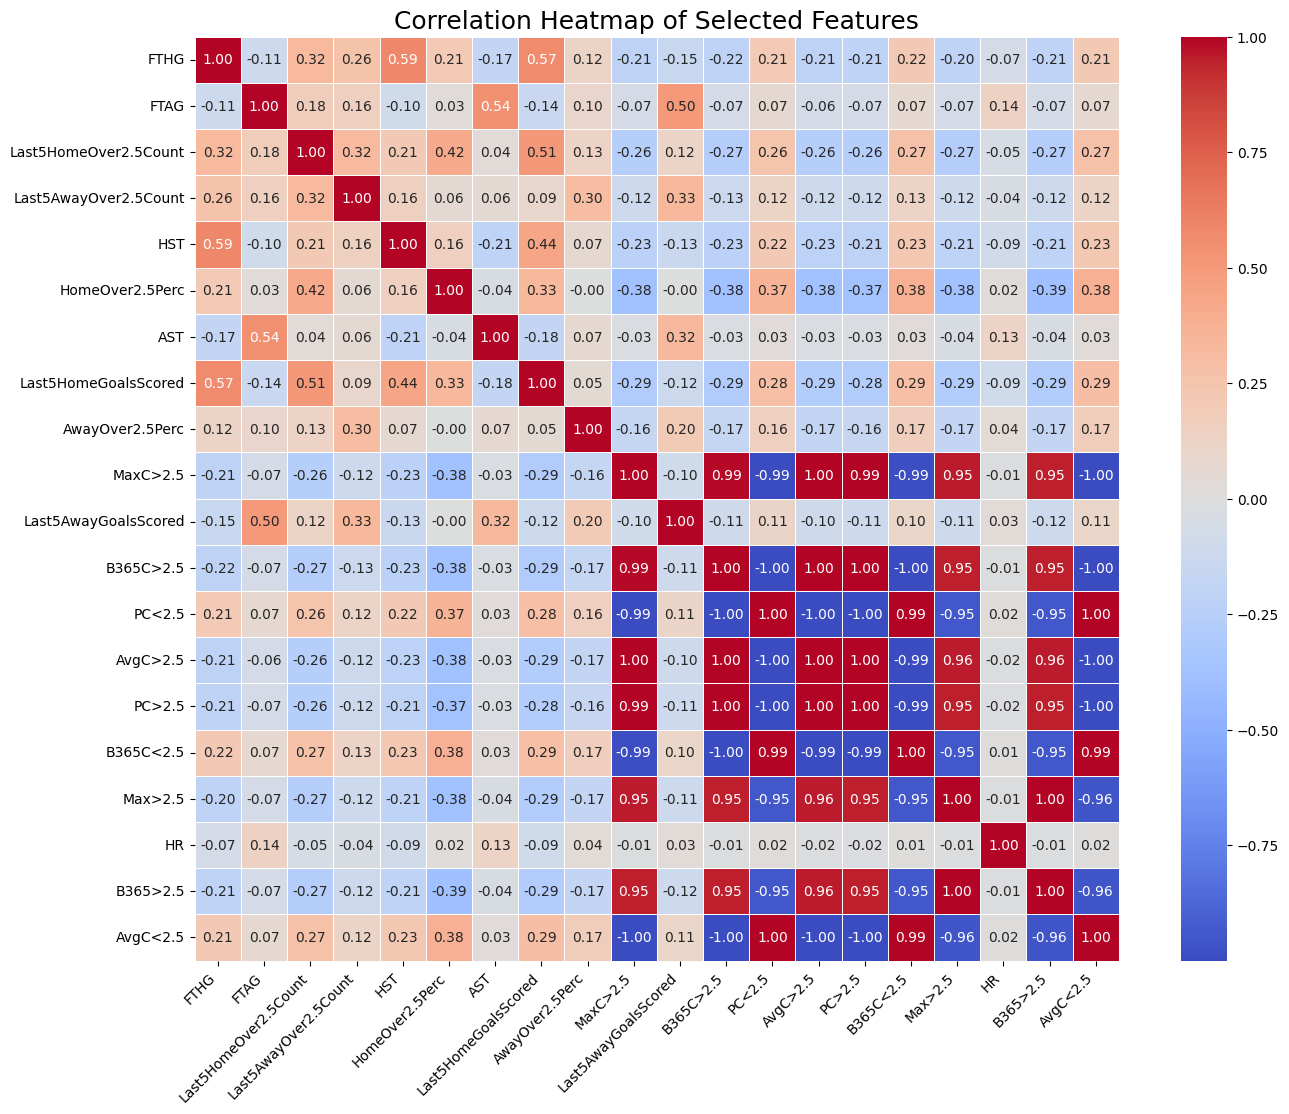

In [168]:
# show the correlation matrix of the selected features
# Calculate the correlation matrix
corr_matrix = uk_data[selected_features].corr(method='spearman')

# Create a heatmap
plt.figure(figsize=(16, 12))  # Adjust the size to fit the data
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, annot_kws={"size": 10},
            linewidths=0.5, linecolor='white', square=True)

# Customize the plot
plt.title('Correlation Heatmap of Selected Features', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.show()



### Feature Grouping and Selection

In [169]:
# Compute the distance matrix (1 - correlation)
dist = sch.distance.pdist(corr_matrix)

# Perform hierarchical clustering
linkage = sch.linkage(dist, method='average')

# Apply a threshold to form flat clusters
cluster_ids = sch.fcluster(linkage, 0.7, criterion='distance')

# Select one feature per cluster
selected_features_clustered = []
for cluster_id in pd.Series(cluster_ids).unique():
    cluster_features = corr_matrix.columns[pd.Series(cluster_ids) == cluster_id]
    # Choose the first feature in each cluster or apply another criteria
    selected_features_clustered.append(cluster_features[0])

print("Selected features after clustering:", selected_features_clustered)


Selected features after clustering: ['FTHG', 'FTAG', 'Last5HomeOver2.5Count', 'Last5AwayOver2.5Count', 'HomeOver2.5Perc', 'AST', 'Last5HomeGoalsScored', 'AwayOver2.5Perc', 'MaxC>2.5', 'Last5AwayGoalsScored', 'PC<2.5', 'HR']


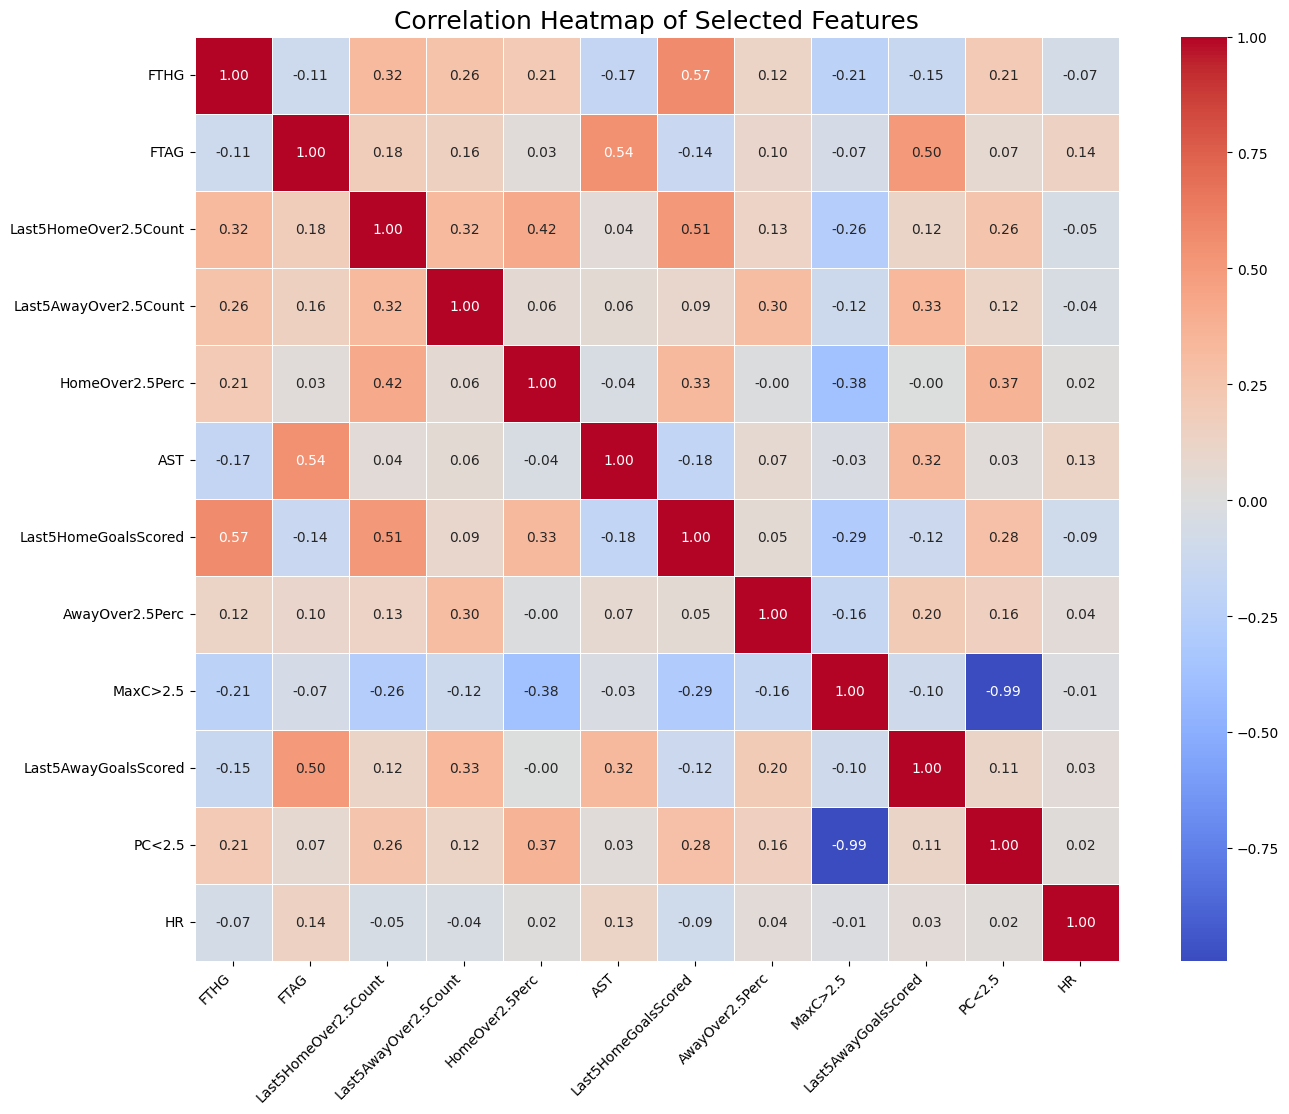

In [170]:
# show the correlation matrix of the selected features
# Calculate the correlation matrix
corr_matrix = uk_data[selected_features_clustered].corr(method='spearman')

# Create a heatmap
plt.figure(figsize=(16, 12))  # Adjust the size to fit the data
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, annot_kws={"size": 10},
            linewidths=0.5, linecolor='white', square=True)

# Customize the plot
plt.title('Correlation Heatmap of Selected Features', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.show()

In [187]:
# create a new dataframe with the selected features
uk_data_selected = uk_data[categorical_columns + selected_features_clustered + ['Over2.5']]

In [188]:
# check the shape of the new dataframe
uk_data_selected.shape

(760, 21)

In [189]:
# Check for missing values in each column
missing_values_count = uk_data_selected.isnull().sum()
print("Missing values in each column:\n", missing_values_count)

Missing values in each column:
 Div                      0
Date                     0
Time                     0
HomeTeam                 0
AwayTeam                 0
FTR                      0
HTR                      0
Referee                  0
FTHG                     0
FTAG                     0
Last5HomeOver2.5Count    0
Last5AwayOver2.5Count    0
HomeOver2.5Perc          0
AST                      0
Last5HomeGoalsScored     0
AwayOver2.5Perc          0
MaxC>2.5                 0
Last5AwayGoalsScored     0
PC<2.5                   8
HR                       0
Over2.5                  0
dtype: int64


In [190]:
# Set the threshold for the maximum allowed counts of missing values
threshold = 10  # For example, 10

# Identify columns to drop
columns_to_drop = missing_values_count[missing_values_count > threshold].index
print("\nColumns to drop due to excessive missing values:\n", columns_to_drop)


Columns to drop due to excessive missing values:
 Index([], dtype='object')


In [191]:
# Drop the columns with too many missing values
uk_data_selected = uk_data_selected.drop(columns=columns_to_drop)

In [192]:
# Drop rows with any missing values
uk_data_selected = uk_data_selected.dropna()

# Check if there are any remaining missing values
print("\nRemaining missing values:\n", uk_data_selected.isnull().sum())



Remaining missing values:
 Div                      0
Date                     0
Time                     0
HomeTeam                 0
AwayTeam                 0
FTR                      0
HTR                      0
Referee                  0
FTHG                     0
FTAG                     0
Last5HomeOver2.5Count    0
Last5AwayOver2.5Count    0
HomeOver2.5Perc          0
AST                      0
Last5HomeGoalsScored     0
AwayOver2.5Perc          0
MaxC>2.5                 0
Last5AwayGoalsScored     0
PC<2.5                   0
HR                       0
Over2.5                  0
dtype: int64
